# Árvores de decisão

Código retirado de http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/IntroML-DecisionTrees-Iris.html

Como as arvores de decisões anteriores ficaram muito profundas e espalhadas, independente dos datasets utilizados, mesmo após a seleção de atributos, serão geradas novas arvores de decisão, mais simples, mas que aceitam mais erros, para verificar quais atributos são utilizados para tentar separar os dados.

In [2]:
library(C50)

Warning message:
"package 'C50' was built under R version 3.6.1"

In [3]:
df = read.csv2("../dataset2/dataset_equilibrado.csv", header=T,sep = ",")

In [4]:
str(df)

'data.frame':	5110 obs. of  24 variables:
 $ Halstead_b        : Factor w/ 289 levels "0.0","0.01","0.02",..: 101 29 22 43 14 34 198 59 161 240 ...
 $ Halstead_d        : Factor w/ 1914 levels "0.0","0.5","0.75",..: 4 657 156 892 261 472 871 686 954 1770 ...
 $ Halstead_e        : Factor w/ 3714 levels "0.0","1.0","100.0",..: 2 974 3346 2010 2763 1017 859 2182 619 3077 ...
 $ Halstead_i        : Factor w/ 2859 levels "0.0","1.0","10.0",..: 2 1709 2183 2010 1146 2230 965 2652 582 234 ...
 $ Halstead_l        : Factor w/ 55 levels "0.0","0.01","0.02",..: 53 6 9 5 8 6 5 6 5 2 ...
 $ Halstead_lOBlank  : int  1 15 27 30 9 31 62 36 93 155 ...
 $ Halstead_lOCode   : int  1 1 4 6 0 7 7 6 11 14 ...
 $ Halstead_lOComment: int  1 19 22 45 7 30 46 14 57 170 ...
 $ Halstead_n        : Factor w/ 706 levels "0.0","1.0","10.0",..: 2 94 33 205 629 145 656 272 606 43 ...
 $ Halstead_t        : Factor w/ 3660 levels "0.0","0.06","0.13",..: 12 3655 2339 1021 1775 59 3553 1208 3305 2075 ...
 $ Halstead_v  

Através das informações dos dados listados acima é necessario realizar algumas conversões de tipos.

In [5]:
df$branchCount  <-  as.numeric(df$branchCount)
df$total_Op     <-  as.numeric(df$total_Op)
df$total_Opnd   <-  as.numeric(df$total_Opnd)
df$uniq_Op      <-  as.numeric(df$uniq_Op)
df$uniq_Opnd    <-  as.numeric(df$uniq_Opnd)

df$Halstead_b   <-  as.numeric(df$Halstead_b)     
df$Halstead_d   <-  as.numeric(df$Halstead_d)  
df$Halstead_e   <-  as.numeric(df$Halstead_e)
df$Halstead_i   <-  as.numeric(df$Halstead_i)  
df$Halstead_l   <-  as.numeric(df$Halstead_l)
df$Halstead_n   <-  as.numeric(df$Halstead_n)  
df$Halstead_t   <-  as.numeric(df$Halstead_t)
df$Halstead_v   <-  as.numeric(df$Halstead_v)
df$McCabe_ev.g. <-  as.numeric(df$McCabe_ev.g.)
df$McCabe_iv.g. <-  as.numeric(df$McCabe_iv.g.)     
df$McCabe_loc   <-  as.numeric(df$McCabe_loc) 
df$McCabe_v.g.  <-  as.numeric(df$McCabe_v.g.)  
df$defects      <-  factor(df$defects)
df$SOFTWARE     <-  NULL

Após os dados já  estarem com os tipo desejados podemos depara-los nos dados de entrada e no de saida

In [6]:
output <- df[["defects"]]
df$defects <- NULL
input <- df

Com os dados separados á podemos aplicar gerar a árvore de decisão.

In [ ]:
Iniciaremos com m modelo com no minimo 1000 amostras por folha.

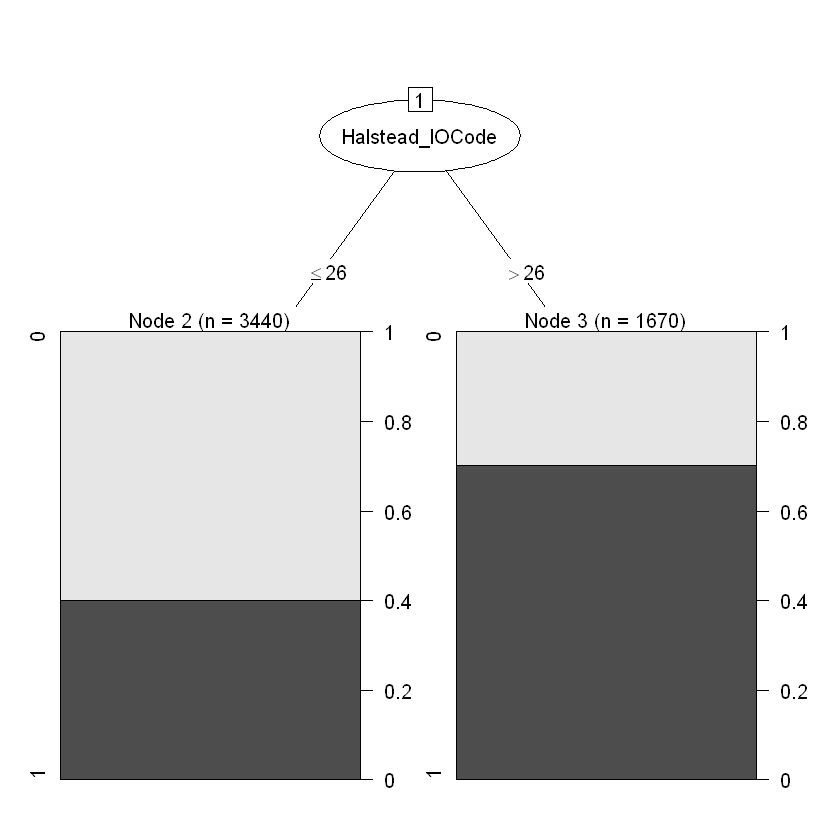

In [7]:
model1 <- C5.0(input, output, control = C5.0Control(noGlobalPruning = TRUE,minCases=1000))
plot(model1)

In [8]:
summary(model1)


Call:
C5.0.default(x = input, y = output, control = C5.0Control(noGlobalPruning
 = TRUE, minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 18 09:35:18 2019
-------------------------------

Class specified by attribute `outcome'

Read 5110 cases (23 attributes) from undefined.data

Decision tree:

Halstead_lOCode <= 26: 0 (3440/1381)
Halstead_lOCode > 26: 1 (1670/496)


Evaluation on training data (5110 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     2 1877(36.7%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	  2059   496    (a): class 0
	  1381  1174    (b): class 1


	Attribute usage:

	100.00%	Halstead_lOCode


Time: 0.1 secs


O modelo 1 não conseguiu realizar a divisão das classes, obtendo 36% de erros. Para tentar melhorar esses resultados diminirá a quantidade de amostras por folha no modelo 2.

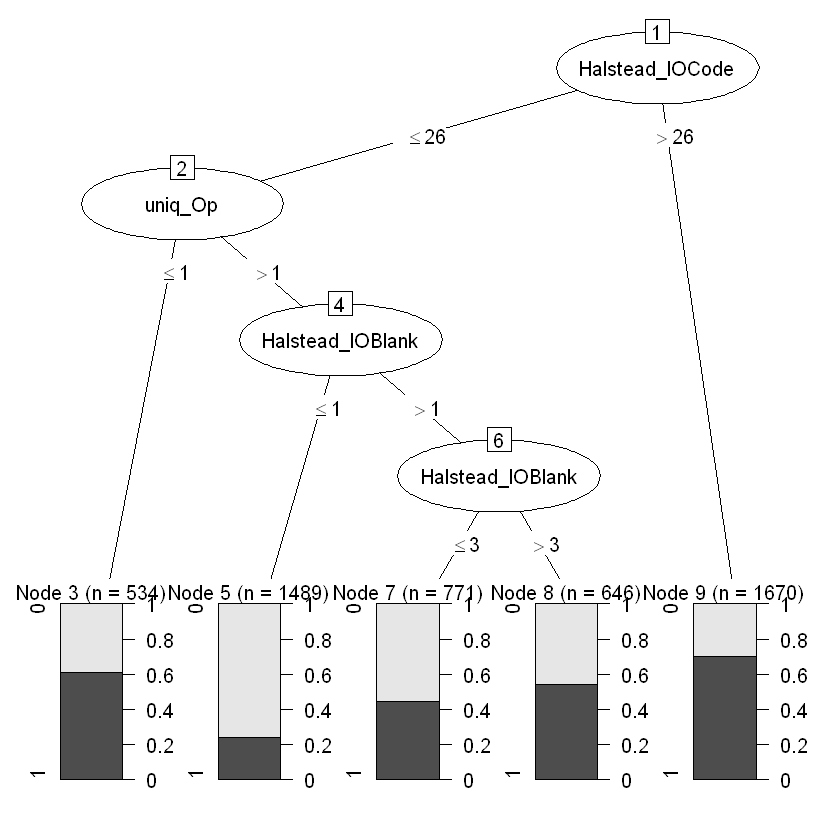

In [9]:
model2 <- C5.0(input, output, control = C5.0Control(noGlobalPruning = TRUE,minCases=500))
plot(model2)

In [10]:
summary(model2)


Call:
C5.0.default(x = input, y = output, control = C5.0Control(noGlobalPruning
 = TRUE, minCases = 500))


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 18 09:35:19 2019
-------------------------------

Class specified by attribute `outcome'

Read 5110 cases (23 attributes) from undefined.data

Decision tree:

Halstead_lOCode > 26: 1 (1670/496)
Halstead_lOCode <= 26:
:...uniq_Op <= 1: 1 (534/207)
    uniq_Op > 1:
    :...Halstead_lOBlank <= 1: 0 (1489/362)
        Halstead_lOBlank > 1:
        :...Halstead_lOBlank <= 3: 0 (771/343)
            Halstead_lOBlank > 3: 1 (646/297)


Evaluation on training data (5110 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     5 1705(33.4%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	  1555  1000    (a): class 0
	   705  1850    (b): class 1


	Attribute usage:

	100.00%	Halstead_lOCode
	 67.32%	uniq_Op
	 56.87%	Halstead_lOBlank


Time: 0.1 secs


O modelo 2 realizou mais divisoes, e utilizou mais atributos, entretanto o desempenho não foi muito superior, pois o modelo obteve 33,4% de erro.


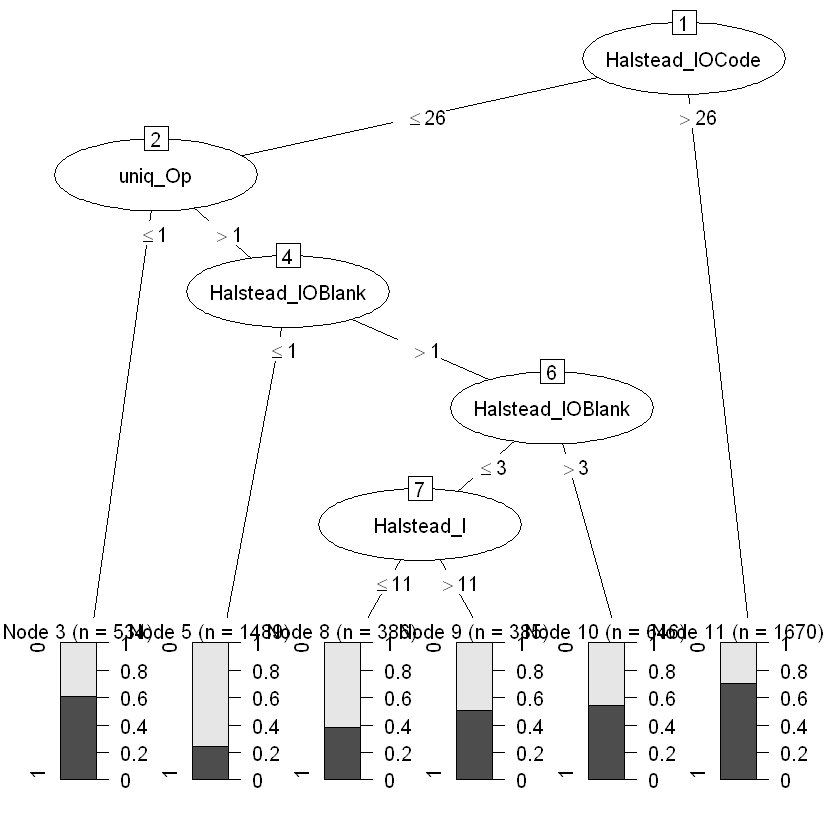

In [15]:
model3 <- C5.0(input, output, control = C5.0Control(noGlobalPruning = TRUE,minCases=250))
plot(model3)

In [16]:
summary(model3)


Call:
C5.0.default(x = input, y = output, control = C5.0Control(noGlobalPruning
 = TRUE, minCases = 250))


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 18 10:00:04 2019
-------------------------------

Class specified by attribute `outcome'

Read 5110 cases (23 attributes) from undefined.data

Decision tree:

Halstead_lOCode > 26: 1 (1670/496)
Halstead_lOCode <= 26:
:...uniq_Op <= 1: 1 (534/207)
    uniq_Op > 1:
    :...Halstead_lOBlank <= 1: 0 (1489/362)
        Halstead_lOBlank > 1:
        :...Halstead_lOBlank > 3: 1 (646/297)
            Halstead_lOBlank <= 3:
            :...Halstead_l <= 11: 0 (386/147)
                Halstead_l > 11: 1 (385/189)


Evaluation on training data (5110 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6 1698(33.2%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	  1366  1189    (a): class 0
	   509  2046    (b): class 1


	Attribute usage:

	100.00%	Halstead_lOCode
	 67.32%	uniq_Op
	 56.87%	Halstead_lOBlank
	 15

No modelo 3, mesmo diminuindo a quantidade minima de amostras por folhas, não obteve-se diminuição significante no erro, alcansando 33,2%, apenas 0,2% melhor do que o modelo 2.

<div style='text-align:left;width:40%;float:left;'>
    <a href="../Selecao_de_Atributos.ipynb">Anterior</a>
</div>
<div style='text-align:right;width:30%; float:right'>
    <a href="../comparacao.ipynb">Próximo</a>
</div>